In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/titanic_clean.csv')
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1


In [3]:
df['Pclass'] = df['Pclass'].astype(int)
df['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [4]:
df['Age'] = df['Age'].astype(int)
df['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

In [5]:
df['Age'].value_counts().sort_values(ascending=False).head(20)

Age
29    197
24     31
22     27
28     27
30     27
18     26
19     25
21     24
36     23
25     23
32     20
26     18
27     18
35     18
16     17
31     17
20     16
34     16
23     16
33     15
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 분석을 위한 데이터를 범위로 추출
df_eda = df.loc[:, 'PassengerId':'Embarked']
df_eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


In [8]:
# 분석을 위한 데이터를 특정 컬럼지정으로 추출
df_eda2 = df.loc[:, ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender_num', 'Embarked_num']]
df_eda2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_num,Embarked_num
0,0,3,22,1,0,7.2500,1,2
1,1,1,38,1,0,71.2833,0,0
2,1,3,26,0,0,7.9250,0,2
3,1,1,35,1,0,53.1000,0,2
4,0,3,35,0,0,8.0500,1,2


<Axes: >

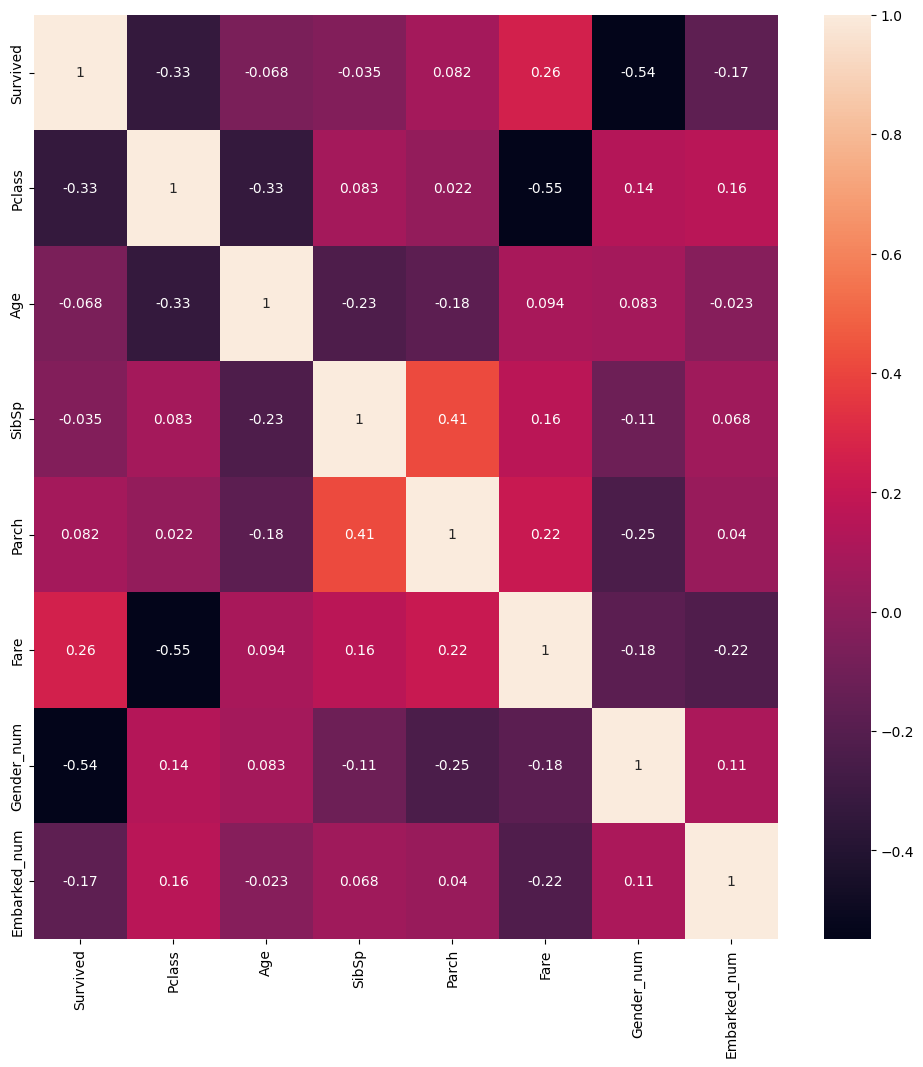

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df_eda2.corr(), annot=True)

<Axes: >

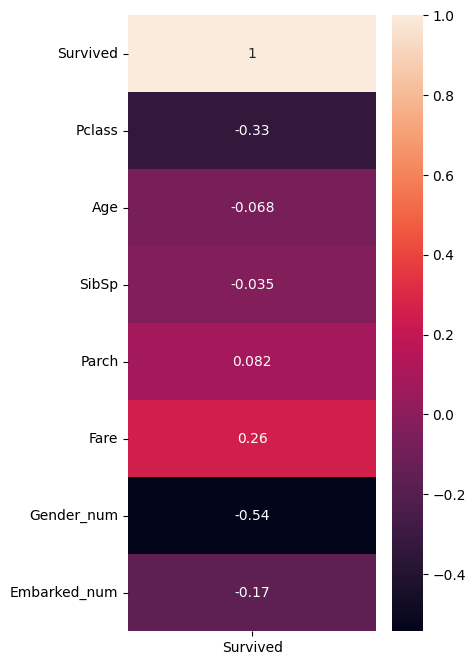

In [10]:
plt.figure(figsize=(4,8))
sns.heatmap(df_eda2.corr()[['Survived']], annot=True)

In [11]:
df_eda['Pclass'].value_counts().sort_values(ascending=False)

Pclass
3    485
1    215
2    191
Name: count, dtype: int64

#### 생존자 (Survived) 컬럼과 각 피처간의 관계 살펴보기

<Axes: xlabel='Pclass', ylabel='Count'>

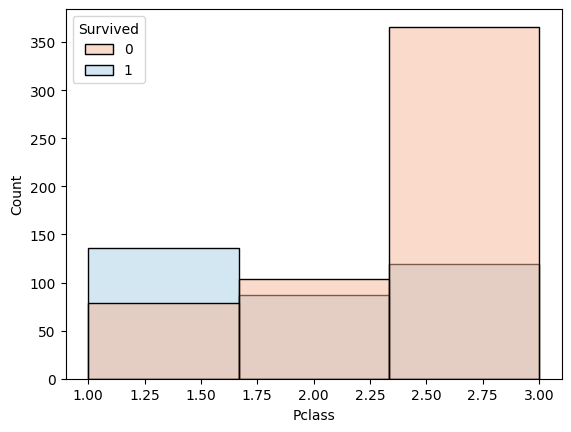

In [12]:
# 좌석 등급과 생존과의 관계
sns.histplot(data = df_eda, x ="Pclass", hue = "Survived", bins=3, palette = 'RdBu')

<Axes: xlabel='Sex', ylabel='Count'>

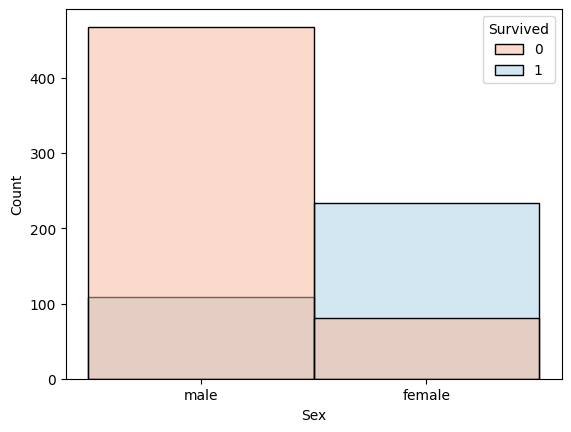

In [14]:
# 성별과 생존과의 관계를 histplot()
sns.histplot(data = df_eda, x = "Sex", hue="Survived", bins = 2, palette='RdBu')

<Axes: xlabel='Survived', ylabel='count'>

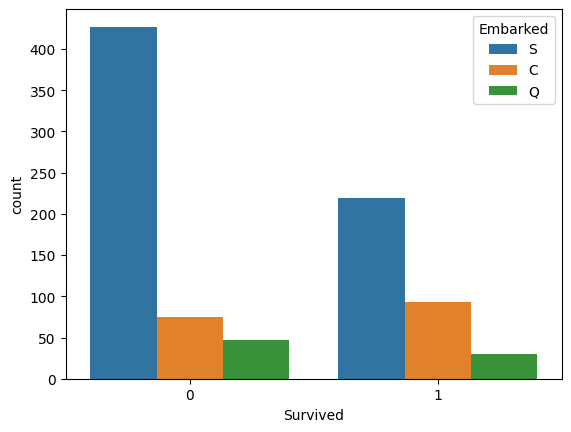

In [20]:
sns.countplot(data= df_eda, x ="Survived", hue = "Embarked", hue_order= ['S','C','Q'])

## 특징 데이터(X, feature)와 정답 데이터(y, target) 분할

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [23]:
#머신러닝에 사용할 특징 데이터 추출
features = ['Pclass','Gender_num', 'Age', 'Fare', 'E_C', 'E_Q', 'E_S' ]
data_X = df[features]
data_X

,Pclass,Gender_num,Age,Fare,E_C,E_Q,E_S
0,3,1,22,7.2500,0,0,1
1,1,0,38,71.2833,1,0,0
2,3,0,26,7.9250,0,0,1
3,1,0,35,53.1000,0,0,1
4,3,1,35,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,2,1,27,13.0000,0,0,1
887,1,0,19,30.0000,0,0,1
888,3,0,29,23.4500,0,0,1
889,1,1,26,30.0000,1,0,0


In [24]:
#target(y,label) 데이터 추출
data_y = df['Survived']
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 학습 데이터와 테스트 데이터 분할
- 학습 데이터(X_train, y_train), 테스트 데이터(X_test)
- test_y : 성능 평가시 y_predict와 비교 평가

from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import train_test_split

train_test_split(data_X, data_y, test_size=0.25, shuffle=True, random_state : 42)

- test_size: validation set에 할당할 비율 (20% -> 0.2), 기본 0.25(25%)
- shuffle: 데이터를 섞어서 분할, 셔플 옵션 (기본 True)
- random_state: 랜덤 시드값

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=2024)

In [27]:
print(X_train.shape, y_train.shape)

(668, 7) (668,)


In [28]:
print(X_test.shape, y_test.shape)
X_train['Pclass'].value_counts()

(223, 7) (223,)


Pclass
3    367
1    152
2    149
Name: count, dtype: int64

In [29]:
y_train.value_counts()

Survived
0    416
1    252
Name: count, dtype: int64

# 머신러닝 모델 학습하기

Stochastic Gradient Desscent(SGD) : 확률적 경사하강법

In [30]:
from sklearn.linear_model import SGDClassifier

In [31]:
model_sgdc = SGDClassifier()

In [32]:
#모델학습
model_sgdc.fit(X_train, y_train)

SGDClassifier()

# 학습 모델 테스트


In [33]:
y_pred = model_sgdc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [34]:
y_test.to_numpy()

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0])

## 성능평가 

In [35]:
import numpy as np
np.unique((y_pred == y_test), return_counts=True)

(array([False,  True]), array([ 90, 133]))

In [36]:
_, r_cnt = np.unique((y_pred==y_test), return_counts=True)
r_cnt

array([ 90, 133])

In [37]:
#정확도 평가
r_cnt[1]/(r_cnt[0] + r_cnt[1])

np.float64(0.5964125560538116)

In [38]:
(y_pred == y_test).mean()

np.float64(0.5964125560538116)

In [40]:
from sklearn.metrics import accuracy_score
print('예측 정확도 : %.4f' % accuracy_score(y_pred, y_test))

예측 정확도 : 0.5964


In [41]:
# 정밀도(precision), 재현율(recall), 정확도(accuracy)
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       223
           1       0.00      0.00      0.00         0

    accuracy                           0.60       223
   macro avg       0.50      0.30      0.37       223
weighted avg       1.00      0.60      0.75       223



C:\Users\Admin\Anaconda3\envs\skl-py312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\Anaconda3\envs\skl-py312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\Anaconda3\envs\skl-py312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 학습모델

- 최적의 가설함수를 만드었다. 에러(정답(y)-예측(y_pred))가 최소인 함수를 찾음
- w(기울기), b(y절편) 찾음

In [44]:
model_sgdc.coef_.shape

(1, 7)

In [46]:
# w : 기울기
model_sgdc.coef_

array([[ -34.83468802, -576.30018945,  -42.16830655,  -61.44594512,
          98.39271527,   67.8359714 ,  -70.28051091]])

In [47]:
# 절편
model_sgdc.intercept_

array([190.33950341])

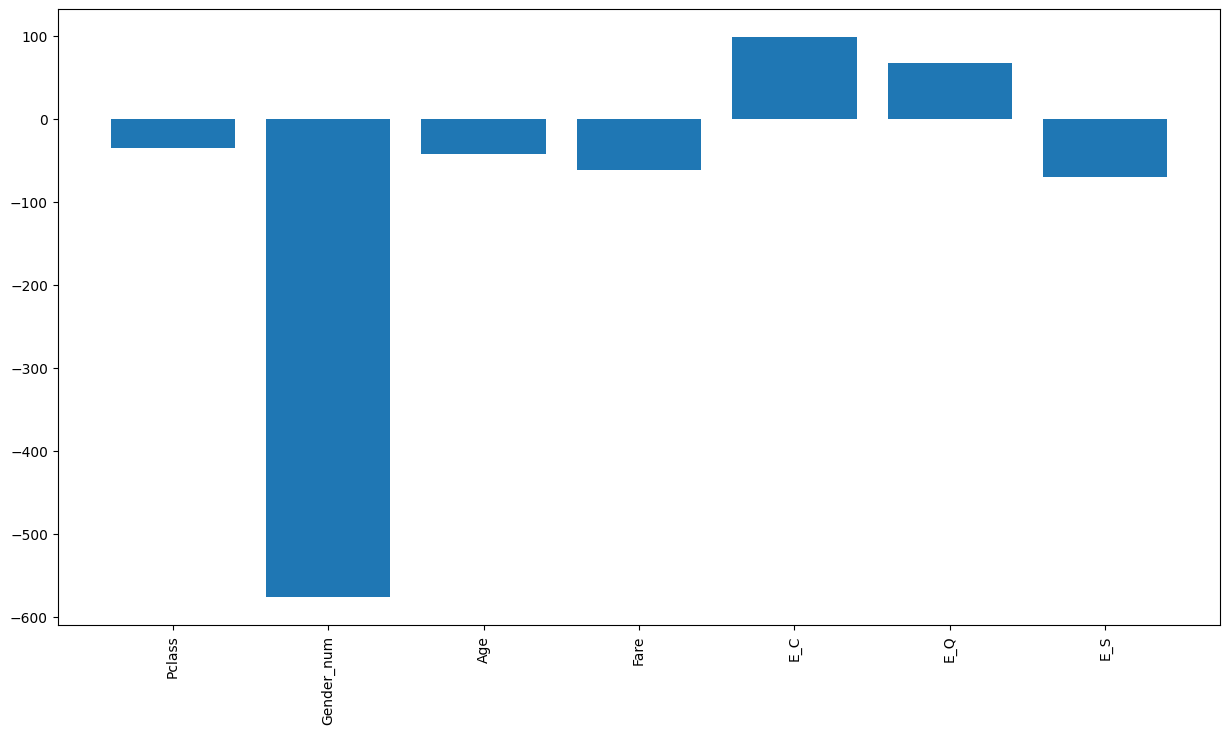

In [48]:
# sgd 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(X_train.columns, model_sgdc.coef_[0,:])
plt.xticks(rotation=90)
plt.show()

결정 계수의 의미

- 예측에 가장 영향을 많이 미친 피처는 Gender_num 임
- Pclass가 -값인 것은 좌석 등급 1등급이 생존율이 더 높음
## [문제] 결정 트리 학습기로 학습모델 만들기

titanic 생존자 예측문제 DecisionTreeClassifier로 모델만들기

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### 모델 만들기

In [50]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_test.to_numpy()

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0])

In [53]:
accuracy_score(y_pred, y_test)

0.7713004484304933

In [55]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       140
           1       0.68      0.73      0.71        83

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.78      0.77      0.77       223

